In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imbikramsaha/fake-real-news")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-real-news' dataset.
Path to dataset files: /kaggle/input/fake-real-news


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional,Dropout
from tensorflow.keras.layers import Dense

In [5]:
df=pd.read_csv("/kaggle/input/fake-real-news/news_dataset.csv")

In [6]:
df.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3721 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2229 non-null   object
 1   text    2229 non-null   object
dtypes: object(2)
memory usage: 52.2+ KB


In [10]:
x=df["text"]
label=LabelEncoder()
y=label.fit_transform(df["label"])

In [11]:
print(x)

0       Payal has accused filmmaker Anurag Kashyap of ...
1       A four-minute-long video of a woman criticisin...
2       Republic Poll, a fake Twitter account imitatin...
3       Delhi teen finds place on UN green list, turns...
4       Delhi: A high-level meeting underway at reside...
                              ...                        
3719    A set of images is being shared on Facebook wi...
3720    Barely 48 hours ahead of voting in the assembl...
3722    A quote by an impostor Facebook page of Financ...
3726    The Bengaluru City Police’s official Twitter h...
3727    Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\...
Name: text, Length: 2229, dtype: object


In [12]:
print(y)

[1 0 0 ... 0 0 1]


In [13]:
encode = [one_hot(str(text), 10000) for text in x]
print(encode[0])

[6138, 3549, 8052, 6135, 387, 9148, 8991, 4555, 9359, 1009, 4691, 888, 2460, 1410, 4572, 5877, 7012, 8785, 9406, 4691, 7736, 2538, 2832, 9048, 9902, 820, 9107, 6374, 9330, 8176, 9048, 6722, 8389, 6330, 7657, 2460, 910, 4955, 6038, 7939, 7929, 1881, 3056, 1881, 391, 9460, 8235, 2694, 6547, 9936, 1881, 214, 5489, 8389, 6547, 9715, 3045, 1228, 7298, 4278, 4284, 123, 214, 3144, 6038, 9420, 7352, 9630, 7684, 9048, 3835, 4278, 3832, 1065, 1881, 4271, 2010, 2915, 3752, 6547, 2018, 842, 5108, 7684, 9048, 3651, 4278, 3832, 1881, 3726, 2575, 4572, 387, 9435, 7684, 1685, 8190, 3502]


In [ ]:
pad_encode=pad_sequences(encode,maxlen=700,padding="post")

In [15]:
pad_encode

array([[6138, 3549, 8052, ...,    0,    0,    0],
       [2460, 4953, 3377, ...,    0,    0,    0],
       [ 886,  747, 2460, ...,    0,    0,    0],
       ...,
       [2460, 5867, 8944, ...,    0,    0,    0],
       [4278, 3020, 7111, ...,    0,    0,    0],
       [4083,   79, 4148, ...,    0,    0,    0]], dtype=int32)

In [16]:
model=Sequential()
model.add(Embedding(10000,64))
model.add(Bidirectional(LSTM(240, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(320, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(120, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(60,)))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(pad_encode,y,test_size=0.3)

In [18]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=32,epochs=10)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 375ms/step - accuracy: 0.8240 - loss: 0.4727 - val_accuracy: 0.9327 - val_loss: 0.1807
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 361ms/step - accuracy: 0.9635 - loss: 0.1053 - val_accuracy: 0.9193 - val_loss: 0.2245
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 367ms/step - accuracy: 0.9509 - loss: 0.1681 - val_accuracy: 0.9522 - val_loss: 0.1393
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 372ms/step - accuracy: 0.9669 - loss: 0.1579 - val_accuracy: 0.9492 - val_loss: 0.2023
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.9959 - loss: 0.0283 - val_accuracy: 0.9686 - val_loss: 0.1126
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 373ms/step - accuracy: 0.9979 - loss: 0.0169 - val_accuracy: 0.9552 - val_loss: 0.1208
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 374ms/step - accuracy: 0.9787 - loss: 0.0734 - val_accuracy: 0.9791 - val_loss: 0.0986
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 373ms/step - accuracy: 0.9538 - loss: 0.2000 - val_accu

In [21]:
ypred=model.predict(xtest)
ypred=np.where(ypred>.5,1,0)
print(accuracy_score(ytest,ypred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step
0.9745889387144993


In [22]:
model.history.history

{'accuracy': [0.8378205299377441,
  0.9615384340286255,
  0.9538461565971375,
  0.9666666388511658,
  0.9948717951774597,
  0.995512843132019,
  0.9698718190193176,
  0.9583333134651184,
  0.9814102649688721,
  0.9852564334869385],
 'loss': [0.4134700298309326,
  0.12124302983283997,
  0.14231842756271362,
  0.15256285667419434,
  0.03236538916826248,
  0.022993026301264763,
  0.12520505487918854,
  0.19026516377925873,
  0.09230067580938339,
  0.07628820091485977],
 'val_accuracy': [0.9327354431152344,
  0.9192824959754944,
  0.9521673917770386,
  0.9491778612136841,
  0.9686098694801331,
  0.9551569223403931,
  0.9790732264518738,
  0.9671151041984558,
  0.974588930606842,
  0.974588930606842],
 'val_loss': [0.18066348135471344,
  0.2244582176208496,
  0.1392759382724762,
  0.2022669017314911,
  0.11256229877471924,
  0.12078792601823807,
  0.09859756380319595,
  0.14604420959949493,
  0.1189967468380928,
  0.11837711185216904]}

Text(0.5, 0, 'epoch')

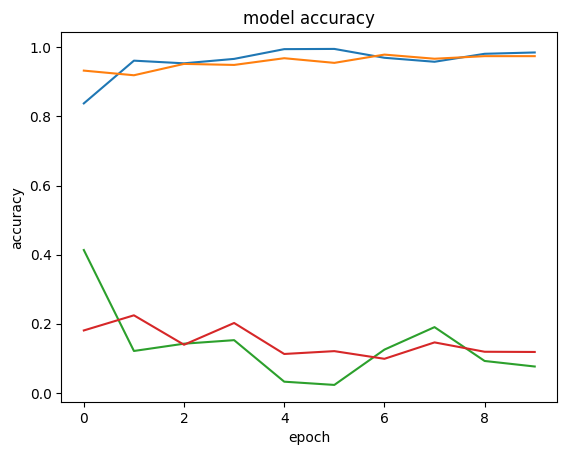

In [23]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
model_save_path = '/content/drive/My Drive/fake_vs_real_news_model.keras'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/My Drive/fake_vs_real_news_model.keras
